# WeatherPy
----
Observations and Insights

After analyzing the graphs, several considerations can be made, including the following:
- The Northern Hemisphere displays a negative slope with a negative correlation between Temperature and Latitude, however the Southern Hemisphere displays a positive slope with a positive correlation between Temperature and Latitude. In other words, as you move away from the equator in the Northern Hemisphere the temperature decreases. Conversely, as you move away from the equator in the Southern Hemisphere the temperature increases
- The graphs show that there are no clear relationship beetween Humidity and Latitude in the northern and Southern Hemisphere. We can however observe a moderate positive correlation between latitude and humidity for northern hemisphere
- There are no clear relationship between Latitude and Wind Speed in the graphs. We can observe a weak positive correlation between latitude and Wind Speed for northern hemisphere and weak negative correlation between latitude and Wind Speed for Southern hemisphere.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Create a dataframe to store the data
city_weather = pd.DataFrame({'City': cities, 'Cloudiness': "", 'Country': "", 'Date': "",
                            'Humidity': "", 'Lat': "", 'Lng': "", 'Max Temp': "", 'Windspeed': ""})

#Preview the dataframe
city_weather.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Windspeed
0,ust-kamchatsk,,,,,,,,
1,sorong,,,,,,,,
2,ribeira grande,,,,,,,,
3,ushuaia,,,,,,,,
4,samusu,,,,,,,,


In [4]:
#Variables to keep track of response number
record_num = 1
record_set = 1

#Base url to make the api call
base_url = 'http://api.openweathermap.org/data/2.5/weather?units=imperial&q='
#Run the API call for each city
print('''
-----------------------------
Beginning Data Retrieval
-----------------------------''')



-----------------------------
Beginning Data Retrieval
-----------------------------


In [5]:
for index, row in city_weather.iterrows(): 
    #Create the query url for the API call
    query_url = base_url + row['City'] + ',' + row['Country'] + '&APPID=' + weather_api_key
    
    #API call
    response = requests.get(query_url).json()
    #Exception script in case the city is not found by the API call
    try: 
        #Meassage to alert the user that the data is being retrieved
        print(f'Processing Weather Data for Record {record_num} of Set {record_set} | {response["name"]}')
        
        #Input data into the dataframe
        
        city_weather.loc[index, 'Country'] = response['sys']['country']
        city_weather.loc[index, 'Cloudiness'] = response['clouds']['all']
        city_weather.loc[index, 'Date'] = response['dt']
        city_weather.loc[index, 'Humidity'] = response['main']['humidity']
        city_weather.loc[index, 'Lat'] = response['coord']['lat']
        city_weather.loc[index, 'Lng'] = response['coord']['lon']
        city_weather.loc[index, 'Max Temp'] = response['main']['temp_max']
        city_weather.loc[index, 'Windspeed'] = response['wind']['speed']
        
        #Increase the record count
        record_num += 1
    except (KeyError, IndexError):
        print("City not found....Skipping............")
    
    #If statement to handle the API call limits
    if record_num == 51:
        record_set += 1
        record_num = 1
        time.sleep(60)
print("-----------------------------")        
print("Data Retrieval Complete")
print("-----------------------------")

City not found....Skipping............
Processing Weather Data for Record 1 of Set 1 | Sorong
Processing Weather Data for Record 2 of Set 1 | Ribeira Grande
Processing Weather Data for Record 3 of Set 1 | Ushuaia
City not found....Skipping............
Processing Weather Data for Record 4 of Set 1 | Tuktoyaktuk
Processing Weather Data for Record 5 of Set 1 | Yellowknife
Processing Weather Data for Record 6 of Set 1 | Atuona
Processing Weather Data for Record 7 of Set 1 | Longyearbyen
Processing Weather Data for Record 8 of Set 1 | Lashio
Processing Weather Data for Record 9 of Set 1 | Mount Isa
Processing Weather Data for Record 10 of Set 1 | Qasigiannguit
Processing Weather Data for Record 11 of Set 1 | Hermanus
Processing Weather Data for Record 12 of Set 1 | Albany
City not found....Skipping............
Processing Weather Data for Record 13 of Set 1 | Nālūt
Processing Weather Data for Record 14 of Set 1 | Vaini
Processing Weather Data for Record 15 of Set 1 | Boa Vista
Processing Wea

Processing Weather Data for Record 25 of Set 3 | Salalah
City not found....Skipping............
Processing Weather Data for Record 26 of Set 3 | Winona
City not found....Skipping............
Processing Weather Data for Record 27 of Set 3 | Poum
Processing Weather Data for Record 28 of Set 3 | Cuamba
Processing Weather Data for Record 29 of Set 3 | Manggar
Processing Weather Data for Record 30 of Set 3 | Hīt
Processing Weather Data for Record 31 of Set 3 | Agadir
Processing Weather Data for Record 32 of Set 3 | Tessalit
Processing Weather Data for Record 33 of Set 3 | Klaksvík
Processing Weather Data for Record 34 of Set 3 | Saskylakh
Processing Weather Data for Record 35 of Set 3 | Jackson
Processing Weather Data for Record 36 of Set 3 | Winslow
Processing Weather Data for Record 37 of Set 3 | Touros
Processing Weather Data for Record 38 of Set 3 | Saldanha
Processing Weather Data for Record 39 of Set 3 | Nishihara
Processing Weather Data for Record 40 of Set 3 | Sisophon
City not foun

Processing Weather Data for Record 8 of Set 6 | Puerto Madero
Processing Weather Data for Record 9 of Set 6 | Viedma
Processing Weather Data for Record 10 of Set 6 | Zamānia
Processing Weather Data for Record 11 of Set 6 | Bavly
Processing Weather Data for Record 12 of Set 6 | Bambous Virieux
Processing Weather Data for Record 13 of Set 6 | Pringsewu
City not found....Skipping............
Processing Weather Data for Record 14 of Set 6 | Bonnyville
Processing Weather Data for Record 15 of Set 6 | Ballina
Processing Weather Data for Record 16 of Set 6 | Esim
Processing Weather Data for Record 17 of Set 6 | Kahului
City not found....Skipping............
City not found....Skipping............
Processing Weather Data for Record 18 of Set 6 | Tura
Processing Weather Data for Record 19 of Set 6 | Cabo San Lucas
City not found....Skipping............
Processing Weather Data for Record 20 of Set 6 | Novobohdanivka
Processing Weather Data for Record 21 of Set 6 | Narsaq
Processing Weather Data f

Processing Weather Data for Record 34 of Set 8 | Nanortalik
Processing Weather Data for Record 35 of Set 8 | Mirny
Processing Weather Data for Record 36 of Set 8 | Saint George
Processing Weather Data for Record 37 of Set 8 | Kieta
Processing Weather Data for Record 38 of Set 8 | Sterling
Processing Weather Data for Record 39 of Set 8 | Gijang
Processing Weather Data for Record 40 of Set 8 | Merauke
Processing Weather Data for Record 41 of Set 8 | Hamilton
Processing Weather Data for Record 42 of Set 8 | Muisne
Processing Weather Data for Record 43 of Set 8 | Geraldton
Processing Weather Data for Record 44 of Set 8 | Sintea Mare
Processing Weather Data for Record 45 of Set 8 | Okhotsk
Processing Weather Data for Record 46 of Set 8 | Rabo de Peixe
Processing Weather Data for Record 47 of Set 8 | Saint-Augustin
Processing Weather Data for Record 48 of Set 8 | Kidal
Processing Weather Data for Record 49 of Set 8 | Karratha
Processing Weather Data for Record 50 of Set 8 | Vallenar
Processi

Processing Weather Data for Record 17 of Set 11 | Gravdal
City not found....Skipping............
Processing Weather Data for Record 18 of Set 11 | Elizabethton
Processing Weather Data for Record 19 of Set 11 | Kampong Chhnang
Processing Weather Data for Record 20 of Set 11 | Moba
Processing Weather Data for Record 21 of Set 11 | Tucumcari
Processing Weather Data for Record 22 of Set 11 | Wad Medani
Processing Weather Data for Record 23 of Set 11 | Paamiut
Processing Weather Data for Record 24 of Set 11 | Olinda
Processing Weather Data for Record 25 of Set 11 | Achinsk
Processing Weather Data for Record 26 of Set 11 | Cedral
Processing Weather Data for Record 27 of Set 11 | São José da Coroa Grande
Processing Weather Data for Record 28 of Set 11 | Meulaboh
Processing Weather Data for Record 29 of Set 11 | Noumea
Processing Weather Data for Record 30 of Set 11 | Porto Belo
Processing Weather Data for Record 31 of Set 11 | Lavrentiya
Processing Weather Data for Record 32 of Set 11 | Vega 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
city_weather.count()

City          604
Cloudiness    604
Country       604
Date          604
Humidity      604
Lat           604
Lng           604
Max Temp      604
Windspeed     604
dtype: int64

In [7]:
city_weather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Windspeed
0,ust-kamchatsk,,,,,,,,
1,sorong,94,ID,1650823377,83,-0.8833,131.25,81.23,9.69
2,ribeira grande,40,PT,1650823378,67,38.5167,-28.7,63,17.27
3,ushuaia,99,AR,1650823331,66,-54.8,-68.3,43.41,3.38
4,samusu,,,,,,,,


In [8]:
#Export DataFrame to CSV File
city_weather.to_csv("city_weather.csv")


In [9]:
import pandas as pd

In [10]:
city_weather=pd.read_csv("city_weather.csv")

In [11]:
df=pd.DataFrame(city_weather)
del df['Unnamed: 0']
df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Windspeed
0,ust-kamchatsk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,sorong,94.0,ID,1.650823e+09,83.0,-0.8833,131.25,81.23,9.69
2,ribeira grande,40.0,PT,1.650823e+09,67.0,38.5167,-28.70,63.00,17.27
3,ushuaia,99.0,AR,1.650823e+09,66.0,-54.8000,-68.30,43.41,3.38
4,samusu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

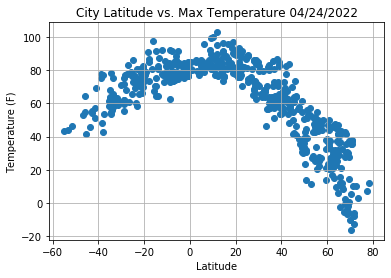

In [12]:
# Build a scatter plot for each data type
plt.scatter(city_weather["Lat"], city_weather["Max Temp"], marker="o")
# Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Temperature {time.strftime("%m/%d/%Y")}')
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
#Save the figure
plt.savefig("../Images/City Latitude vs Max Temperature.png")

# Show plot
plt.show()


As we can see,highest temperature is found arround 0.The plot shows that as we move from the equator, temperature decrease.

## Latitude vs. Humidity Plot

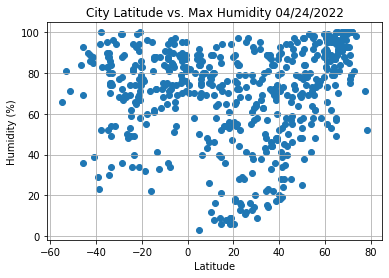

In [13]:
# Build a scatter plot for each data type
plt.scatter(city_weather["Lat"], city_weather["Humidity"], marker="o")
# Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Humidity {time.strftime("%m/%d/%Y")}')
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
#Save the figure
plt.savefig("../Images/City Latitude vs Humidity.png")

# Show plot
plt.show()

This plot shows that there are quasi no corelation between Latitude and Humidity. However we can see that as latitude is higher,humidity is higher in the Southern hemisphere

## Latitude vs. Cloudiness Plot

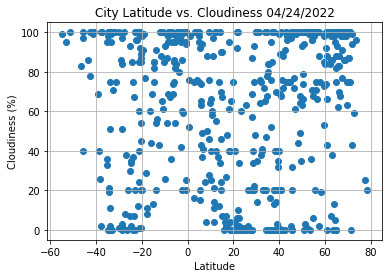

In [14]:
# Build a scatter plot for each data type
plt.scatter(city_weather["Lat"], city_weather["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Cloudiness {time.strftime("%m/%d/%Y")}')
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
#Save the figure
plt.savefig("../Images/City Latitude vs Cloudiness.png")

# Show plot
plt.show()

We can observe in the plot that there are no correlation between Latitude and Cloudiness

## Latitude vs. Wind Speed Plot

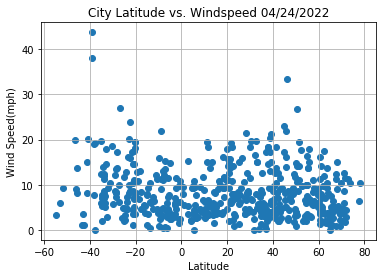

In [15]:
# Build a scatter plot for each data type
plt.scatter(city_weather["Lat"], city_weather["Windspeed"], marker="o")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Windspeed {time.strftime("%m/%d/%Y")}')
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.grid(True)
#Save the figure
plt.savefig("../Images/City Latitude vs Wind Speed.png")

# Show plot
plt.show()

The plotshows that there are no real relatinship between Latitude and Wind Speed

## Linear Regression

In [16]:
#Create a function to create Linear Regression plots
# Add the linear regression equation and line to plot
def linear_reg_plot(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
    plt.xlabel("Latitude")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [17]:
# Create Northern and Southern Hemisphere DataFrames
Northern_hemisphere = city_weather.loc[city_weather["Lat"]>0]
Southern_hemisphere = city_weather.loc[city_weather["Lat"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8829799477825645


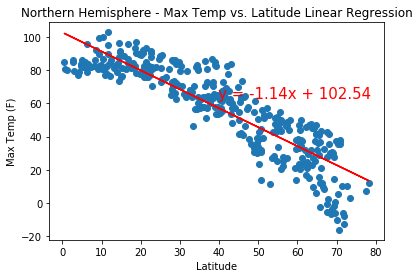

None


In [18]:
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Max Temp"]
plt.ylabel("Max Temp (F)")
# Save the figure
plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7490227193645077


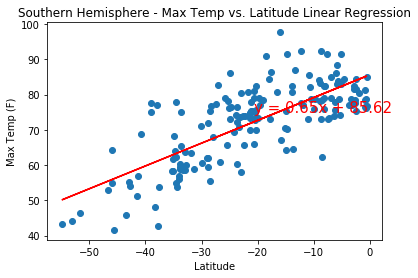

None


In [19]:
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Max Temp"]
plt.ylabel("Max Temp (F)")
plt.savefig("../Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
print(linear_reg_plot(x_values,y_values))

The Two previous plot show the following:
    The Northern Hemisphere displays a negative slope with a negative correlation between Temperature and Latitude, however the Southern Hemisphere displays a positive slope with a positive correlation between Temperature and Latitude.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.3947005730347692


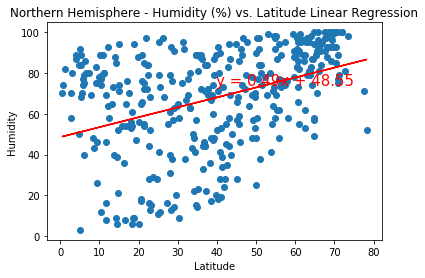

None


In [20]:
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Humidity"]
plt.ylabel("Humidity")
# Save the figure
plt.savefig("../Images/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")
print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.113420741768732


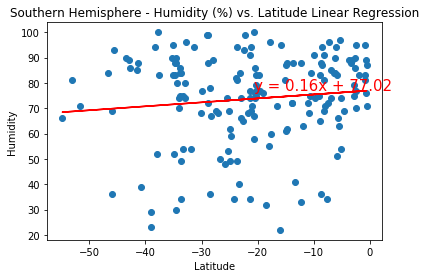

None


In [21]:
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Humidity"]
plt.ylabel("Humidity")
# Save the figure
plt.savefig("../Images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")
print(linear_reg_plot(x_values,y_values))

The two previous graphs show that there are no clear relationship beetween Humidity and Latitude in the northern and Southern Hemisphere. We can however observe a moderate positive correlation between latitude and humidity for northern hemisphere


Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.3468970655311071


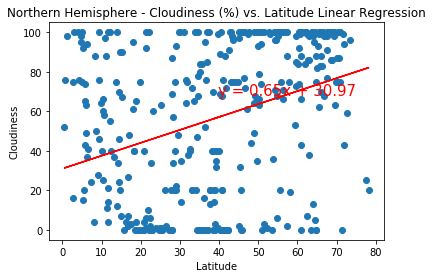

None


In [22]:
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Cloudiness"]
plt.ylabel("Cloudiness")
# Save the figure
plt.savefig("../Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")
print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.14008122624701982


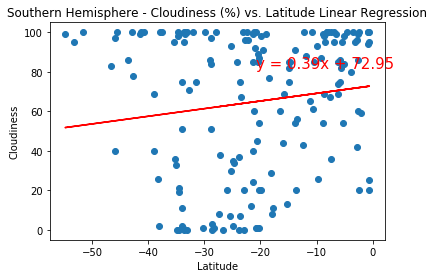

None


In [23]:
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Cloudiness"]
plt.ylabel("Cloudiness")
# Save the figure
plt.savefig("../Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")
print(linear_reg_plot(x_values,y_values))

The two previous graphs show a positive slope. We can indeed observe a moderate positive correlation between latitude and Cloudiness for northern and Southern hemispheres.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.07124664383728145


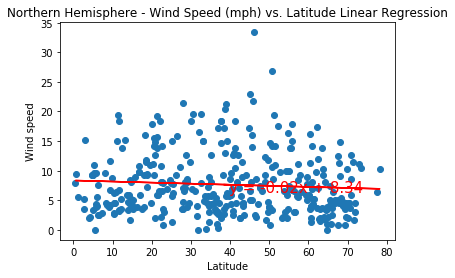

None


In [24]:
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Windspeed"]
plt.ylabel("Wind speed")
# Save the figure
plt.savefig("../Images/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")
print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.2606276619784753


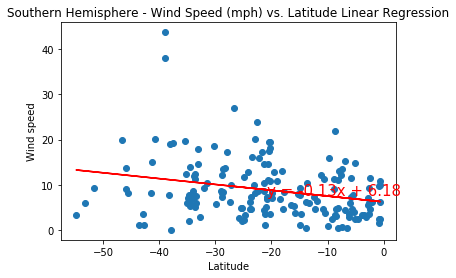

None


In [25]:
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Windspeed"]
plt.ylabel("Wind speed")
# Save the figure
plt.savefig("../Images/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")
print(linear_reg_plot(x_values,y_values))

There are no clear relationship between Latitude and Wind Speed in the two previous graphs. 